In [ ]:
import pandas as pd
file_path = '/content/Car Sales.xlsx - car_data.csv'
data = pd.read_csv(file_path)

In [ ]:

print(data.head())

         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

# Data preprocessing
data['Engine'] = data['Engine'].astype('category').cat.codes
data['Transmission'] = data['Transmission'].astype('category').cat.codes
data['Company'] = data['Company'].astype('category').cat.codes
data['Body Style'] = data['Body Style'].astype('category').cat.codes
data['Color'] = data['Color'].astype('category').cat.codes

X = data[['Engine', 'Transmission', 'Company', 'Body Style', 'Color']]
y = data['Price ($)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 94445425.16942644


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create a binary target variable for price
threshold = 25000
data['Price_Label'] = (data['Price ($)'] > threshold).astype(int)

# Encode categorical features
data['Engine'] = data['Engine'].astype('category').cat.codes
data['Transmission'] = data['Transmission'].astype('category').cat.codes
data['Company'] = data['Company'].astype('category').cat.codes
data['Body Style'] = data['Body Style'].astype('category').cat.codes

# Select features and target
X = data[['Annual Income', 'Engine', 'Transmission', 'Company', 'Body Style']]
y = data['Price_Label']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.5696361355081556
Classification Report:
              precision    recall  f1-score   support

           0       0.57      1.00      0.73      2724
           1       0.00      0.00      0.00      2058

    accuracy                           0.57      4782
   macro avg       0.28      0.50      0.36      4782
weighted avg       0.32      0.57      0.41      4782



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Features for recommendation
X = data[['Annual Income', 'Price ($)']]

# Fit Nearest Neighbors model
model = NearestNeighbors(n_neighbors=5, metric='euclidean')
model.fit(X)

# Example query for recommendation
query = np.array([[50000, 20000]])
distances, indices = model.kneighbors(query)

# Recommended cars
recommendations = data.iloc[indices[0]]
print(recommendations[['Company', 'Model', 'Price ($)']])


            Company       Model  Price ($)
Date                                      
2023-12-15        7  Ram Pickup      20000
2023-11-20       21     Voyager      20000
2023-12-04        5    Cavalier      20000
2023-11-10       19    Frontier      20000
2023-12-03       12      S-Type      20000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = data[['Annual Income', 'Price ($)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.50603248 0.49396752]


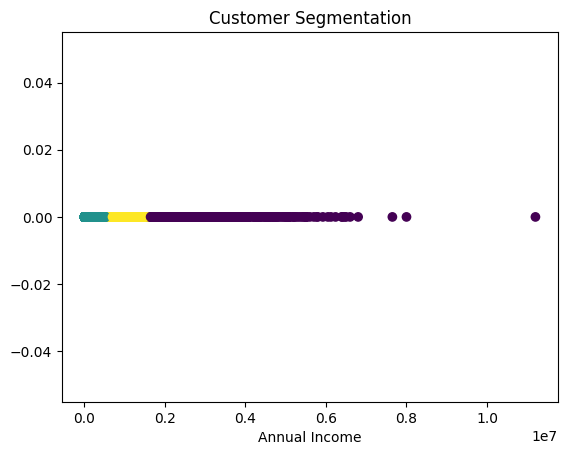

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X = data[['Annual Income']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.scatter(X['Annual Income'], [0]*len(X), c=data['Cluster'], cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.show()


<ipython-input-4-a6c0b0cc5c60>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data['Price ($)'].resample('M').sum()


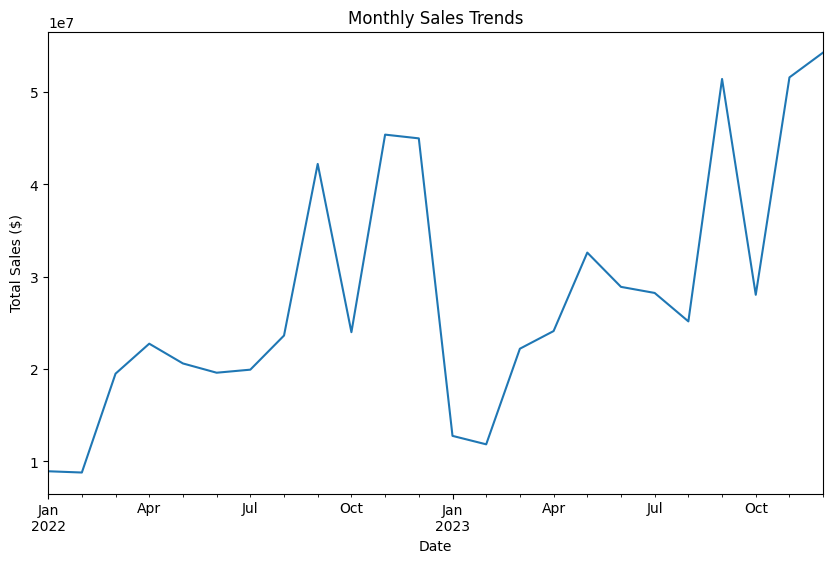

In [ ]:
import matplotlib.pyplot as plt
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Aggregate monthly sales
monthly_sales = data['Price ($)'].resample('M').sum()

# Plot sales trends
plt.figure(figsize=(10, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.show()


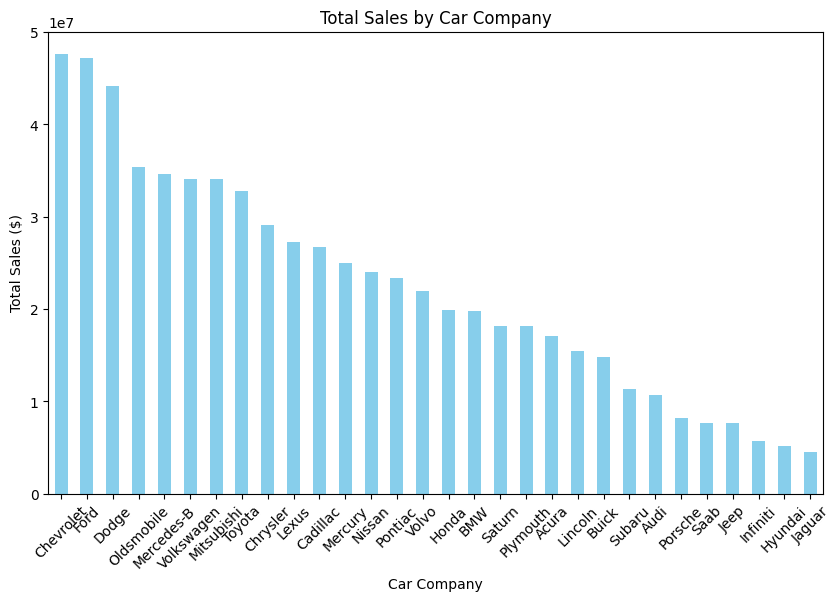

In [ ]:
import matplotlib.pyplot as plt

# Calculating total sales for each company
company_sales = data.groupby('Company')['Price ($)'].sum().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
company_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Car Company')
plt.xlabel('Car Company')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.show()


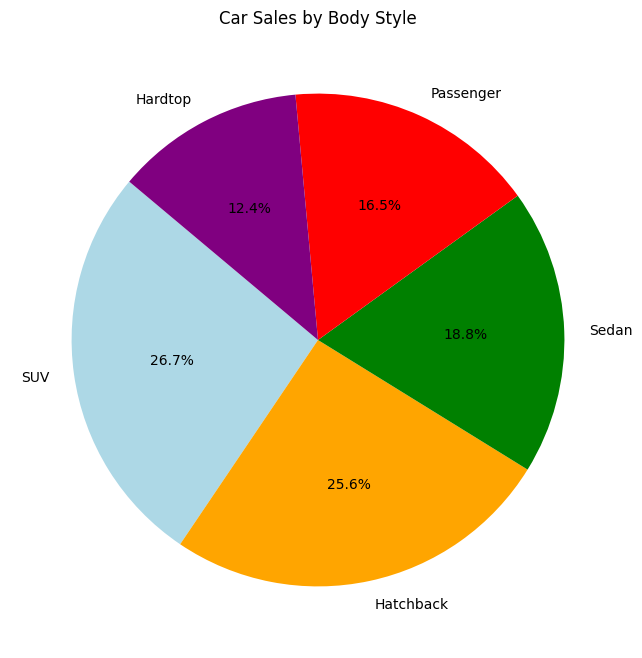

In [ ]:
# Counting the number of cars sold by body style
body_style_counts = data['Body Style'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
body_style_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'orange', 'green', 'red', 'purple'])
plt.title('Car Sales by Body Style')
plt.ylabel('')
plt.show()
